## BreastCancerPredictAI

<table style="margin-left:0; text-align:left;">
<tr><td><b>Author(s):</b></td><td>Mahbub Alam</td></tr>
</table>


## Introduction

Breast Cancer Prediction using Machine Learning:

This project uses the **Breast Cancer Wisconsin Diagnostic Dataset** to build a machine learning model that can classify tumors as *malignant* or *benign*.

It demonstrates an end-to-end ML workflow:

1. Data loading & cleaning
2. Exploratory data analysis (EDA)
3. Preprocessing
4. Model training
5. Model validation
6. Insights and conclusions

Such predictive modeling can support early detection and assist healthcare professionals, though models should **never replace medical diagnosis**.

In [1]:
%matplotlib inline
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and cleaning

 We start by loading the cleaned breast cancer dataset.
Each row represents a tumor with various features extracted from digitized images of a fine needle aspirate (FNA).
The target column indicates whether the tumor is **malignant (cancerous)** or **benign (non-cancerous)**.

---

Machine learning algorithms require clean, numerical, and scaled data.
Steps:
- Handle missing values (if any)
- Find duplicates
- Encode target labels (Malignant = 1, Benign = 0)
- Split dataset into training and testing sets

Looks like there is an extra comma at the end of the columns.
This creates an empty column called "Unnamed: 32".
We shall delete it.

In [2]:
df = pd.read_csv('breast_cancer_data.csv')

# print(df.head())
print(df.columns)
print(f"")
print(df.info())

df = df.drop(columns="Unnamed: 32")
print(f"")

# No missing data
missing_data = df.isna().any()
print(f"Missing data? - {'Yes' if missing_data.any() else 'No'}")

# Drop perfect duplicate rows
before = len(df)
df = df.drop_duplicates()
print(f"Duplicates removed: {before - len(df)}")

# saving cleaned data
df.to_csv('breast_cancer_data_cleaned.csv', index=False)

# Data already cleaned, loading clean data
# Not necessary, just to illustrate
df = pd.read_csv('breast_cancer_data_cleaned.csv')
# print(df.columns) # Output: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_m

## Exploratory data analysis (EDA)

 Understanding the dataset is key before building models.
We will:

- Check class distribution (malignant vs. benign)
- Visualize feature distributions
- Explore correlations between features

### Class distribution

 

In [3]:
# Proportion of benign and malignant tumors

print(df['diagnosis'].value_counts())

X = df.drop(columns=["diagnosis", "id"])
y = (df["diagnosis"] == "M").astype("int")

diagnosis
B    357
M    212
Name: count, dtype: int64


### Visualization

 Radius, texture and perimeter -- mean, standard error and worst value.

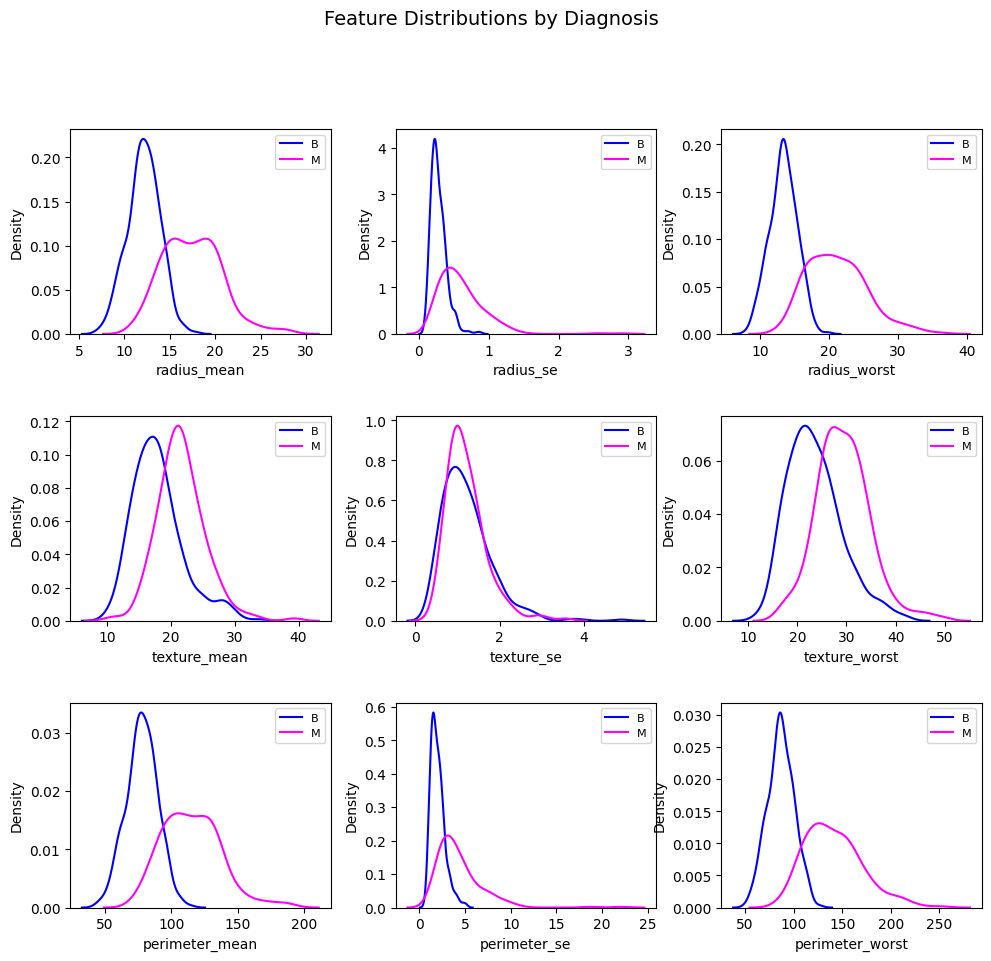

In [4]:
df_benign = df[df["diagnosis"] == "B"]
df_malignant = df[df["diagnosis"] == "M"]

features = X.columns

n_cols = 3
n_rows = 3
size = n_rows * n_cols

fig_name = "Feature Distributions by Diagnosis"
plt.figure(num=fig_name, figsize=(n_rows * 3.5, n_cols * 3.5))

for i in range(size):
    plt.subplot(n_rows, n_cols, i+1)
    feature = features[i//3 + 10 * (i%3)]
    sns.kdeplot(df_benign[feature], color="blue", label="B", fill=False)
    sns.kdeplot(df_malignant[feature], color="magenta", label="M", fill=False)
    plt.legend(loc="upper right", fontsize=8)

plt.suptitle(fig_name, fontsize=14)
plt.tight_layout(pad=2.5, rect=(0, 0.05, 1, 0.95))
plt.subplots_adjust(hspace=0.4, wspace=0.25)

plt.savefig('feature_distribution_eda.jpg')
plt.show()

### Correlation between features

 

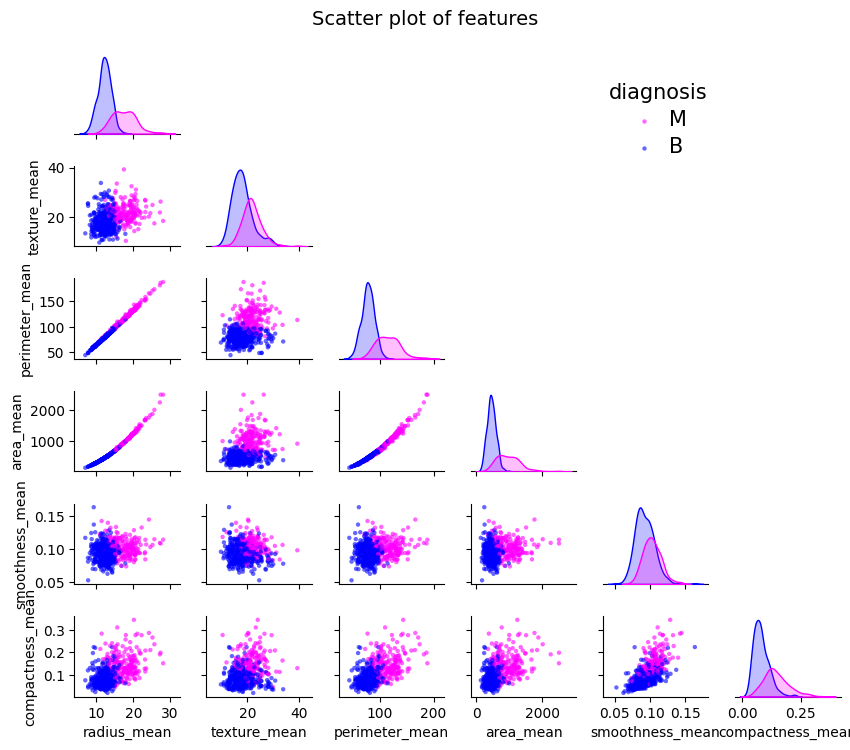

In [5]:
cols = list(X.columns[:6]) + ["diagnosis"]

fig_name = "Scatter plot of features"
g = sns.pairplot(df[cols],
                 hue="diagnosis",
                 corner=True,
                 plot_kws={'alpha': 0.6, 's': 10, 'edgecolor': 'none'},
                 diag_kind="kde",
                 palette={'B': 'blue', 'M': 'magenta'},
                )

g.fig.set_size_inches(9, 9)
plt.setp(g._legend.get_texts(), fontsize=15)
g._legend.get_title().set_fontsize(15)
g._legend.set_bbox_to_anchor((0.8, 0.7))
g.fig.canvas.manager.set_window_title(fig_name)
g.fig.suptitle(fig_name, fontsize=14, y=0.90)
g.fig.tight_layout(pad=2.5, rect=(0, 0.05, 1, 0.95))
g.fig.subplots_adjust(hspace=0.4, wspace=0.25)

g.fig.savefig('correlation_between_features.jpg')
plt.show()

## Data Preprocessing

 Preprocessing the data with ColumnTransformer and StandardScaler.
There are no non-numeric data, we can use StandardScaler safely.

Finally we create train test split for machine learning.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_features = X.columns

# Only necessary if 2 or more encoders (I am adding just for demo)
pre = ColumnTransformer([
    ('scaler', StandardScaler(), X_features)
])

# # Just for testing. Has to be commmented before model training,
# # since this includes X_test in mean_ and scale_
# X = pd.DataFrame(
#     pre.fit_transform(X),
#     columns=X_features,
#     index=df.index
# )
# print(X.info())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

## Model Training

 We will train multiple classifiers (e.g., Logistic Regression,
K Nearest Neighbors, etc.) and Neural Networks and compare their
performance to find the most effective model.

Evaluation metrics include:

- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC

### Creating a pipeline of logistic regression

 We want to determine the best hyperparameters for LogisticRegression.
For this we use GridSearchCV for cross validation.
To do this reliably let us use a pipeline.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ("pre", pre),
    ('lreg', LogisticRegression(max_iter=10000, solver = 'saga', random_state = 42))
])

hparams = [
    {
        'lreg__penalty' : ['l2', 'l1'],
        'lreg__C' : np.logspace(-3, 3, 13),
        'lreg__class_weight' : [None, 'balanced']
    },
    {
        'lreg__penalty' : ['elasticnet'],
        'lreg__C' : np.logspace(-3, 3, 13),
        'lreg__l1_ratio' : np.linspace(0, 1, 5),
        'lreg__class_weight' : [None, 'balanced']
    }
]

cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 43)
grid = GridSearchCV(
    pipe,
    hparams,
    scoring = 'average_precision',
    cv=cv,
    n_jobs=4,
    refit=True
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

best_model.fit(X_train, y_train)

,steps,"[('pre', ...), ('lreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Deciding a threshold for positive results

 Given the model (best_model) will give us probabilities for malignant tumor (between 0 and 1).
It might seem
natural to choose 0.5 as a threshold for positive result, i.e., we might
naively want to call a result positive if probability for positive is >= 0.5.

But a serious diagnosis such as breast cancer should have low threshold to avoid
high number of false negatives.
We want to be absolutely sure that a negative result by the model is truely negative.
Also since the ML algorithms output will be reviewed by professional it is prudent
to keep the threshold low.

In other words we want our model to have **high recall**.

To get some ideas about the threshold, below we check the precision recall curve
on the test set.

#### Definitions

P = (actual) positive data points

N = (actual) negative data points

TP = True positive  : a data point marked positive by the model that is actually positive

FP = False positive : a data point marked positive by the model that is actually negative

FN = False negative : a data point marked negative by the model that is actually positive

Precision = TP / (TP + FP) :
Of the points the model called positive, how many were truly positive?
Here TP + FP are the number of data points the model marked positive.

Recall = TP / (TP + FN) :
Of the actually positive points, how many did the model correctly find?
Here TP + FN are the number of data points that are actually positive.

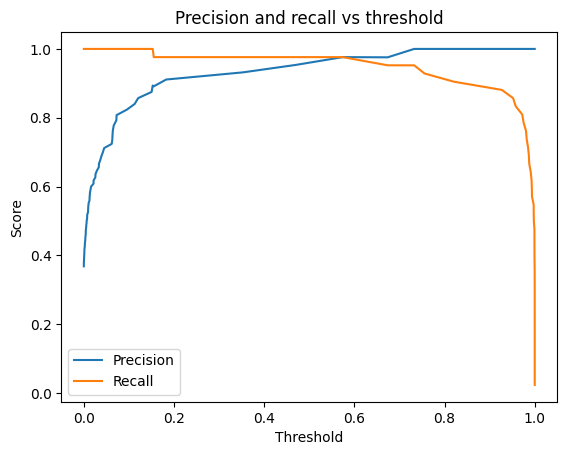

In [8]:
y_probs = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and recall vs threshold")
plt.legend()
plt.show()

### Choosing a threshold

 Since this is a medical application, we don't want the model to miss positives.
We care about high recall, about 99%.
Let's find a threshold that achieves this.
But **we shouldn't use the test set** for choosing this threshold.
This might lead to **overfitting** to the test set.

Let's use cross validation (CV) again for doing this.
More precisely, CV splits the train data (X_train) into CV_train, CV_validation (with different random state than before).
We train our best_model on CV_train. On CV_validation the model gives probabilities for positive results.

Now, there are two ways to proceed:
1. We compare this CV_validation probabilities to relevant y_train to find
a threshold for 99% recall. We can take a median of all these thresholds
found from the CV splits.

2. We can take all these probabilities and stack them to get an array, (the same as y_test)
which we compare to y_test to get a threshold for 99% recall.

The second method is more robust for medical applications, it collects
validation signal on the whole training set (each point predicted by a model that didn’t see it).

In [9]:
def pick_threshold_for_recall(y_true, y_probs, target_recall=0.99):
    """
    Returns the highest threshold whose recall >= target_recall.
    Using the highest such threshold usually gives better precision.
    """
    _, recall, thresholds = precision_recall_curve(y_true, y_probs)
    # precision/recall have length = len(thresholds)+1; align by dropping the first PR point
    recall_t = recall[:-1]
    thresholds_t = thresholds

    # indices where recall constraint is satisfied
    ok = np.where(recall_t >= target_recall)[0]
    if len(ok) == 0:
        # cannot reach target recall; fall back to threshold=0 (max recall)
        chosen = 0.0
    else:
        # choose the largest threshold that still satisfies recall >= target
        chosen = thresholds_t[ok[-1]]
    return float(chosen)

from sklearn.base import clone

cv_thresh = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)  # NEW seed
oof_probs = np.empty(len(y_train), dtype=float) # Out of fold probs

for tr, va in cv_thresh.split(X_train, y_train):
    # start the best_model with initial state
    est = clone(best_model)
    est.fit(X_train.iloc[tr], y_train.iloc[tr])
    oof_probs[va] = est.predict_proba(X_train.iloc[va])[:, 1]

# pick threshold on OOF to hit target recall
threshold = pick_threshold_for_recall(y_train, oof_probs, target_recall=0.99)

### Saving the model and the threshold

 At this point we can save the model and the threshold for future use.

In [10]:
import joblib

# final refit on full train, then apply fixed threshold on test
best_model.fit(X_train, y_train)

# save to file
joblib.dump(best_model, "best_model.pkl")

import json
with open("chosen_threshold.json", "w") as f:
    json.dump({"threshold": float(threshold)}, f)

# # Only when loading saved model and threshold
# # load best_model from file
# best_model = joblib.load("best_model.pkl")

# # load back
# with open("chosen_threshold.json") as f:
#     threshold = json.load(f)["threshold"]

## Model Evaluation

 We compare model performance on the test set.
Metrics and confusion matrices help us assess:

- How well the model detects malignant tumors (sensitivity/recall)
- How well it avoids false positives (specificity/precision)

The ROC curve and AUC score further summarize predictive power.

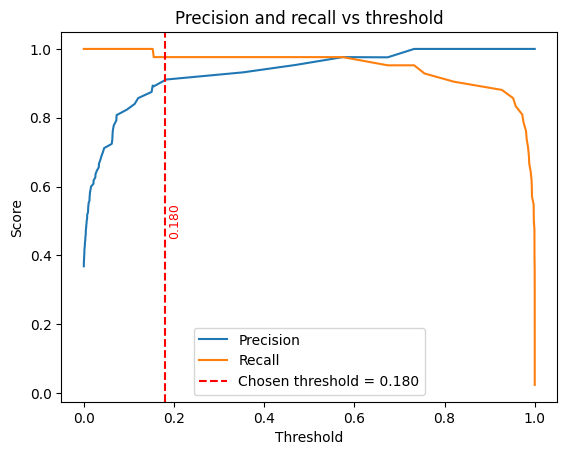


Model report:
    threshold            : 0.1802
    precision            : 0.9111
    recall               : 0.9762
    accuracy             : 0.9561
    confusion_matrix     :
[[68  4]
 [ 1 41]]


In [11]:
y_preds = (y_probs >= threshold).astype(int)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.axvline(x=threshold, color="red", linestyle="--", linewidth=1.5,
            label=f"Chosen threshold = {threshold:.3f}")
plt.text(threshold*1.2, 0.5, f"{threshold:.3f}", rotation=90,
         va='center', ha='right', color='red', fontsize=9)
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and recall vs threshold")
plt.legend()
plt.show()

# from sklearn.metrics import PrecisionRecallDisplay
# _ = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
# plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def metrics_at_threshold(y_true, y_preds, threshold):
    return {
        "threshold": threshold,
        "precision": precision_score(y_true, y_preds, zero_division=0),
        "recall": recall_score(y_true, y_preds, zero_division=0),
        "accuracy": accuracy_score(y_true, y_preds),
        "confusion_matrix": confusion_matrix(y_true, y_preds)  # [[TN, FP],[FN, TP]]
    }


report = metrics_at_threshold(y_test, y_preds, threshold)

# results
print("\nModel report:")
for metric, value in report.items():
    if metric == "confusion_matrix":
        print(f"    {metric:20} :")
        print(f"{value}")
    else:
        print(f"    {metric:20} : {value:.4f}")


# Output:
# {'threshold': 0.18020206682554823, 'precision': 0.9111111111111111, 'recall': 0.9761904761904762, 'accuracy': 0.956140350877193,
#  'confusion_matrix': array([[68,  4],
#        [ 1, 41]])}

## Conclusion

 - The models show strong ability to distinguish between malignant and benign tumors.
- best_model achieved the highest performance, with 95.6% accuracy and 97.6% recall.
- This demonstrates the potential of ML in assisting medical diagnostics.

Note: This project is for educational and demonstration purposes only.
It should **not** be used for clinical decision-making.

## Next Steps

 Potential improvements:

- Feature selection to reduce dimensionality
- Ensemble methods for better generalization
- Deployment as a simple web app (e.g., with Flask or Streamlit)

This would make the project even more practical and showcase end-to-end ML engineering skills.